# Equilibrium of Markov Chains

This example refers to the discussion of Markov Chains in the course-book "Infenrece & Causality" unit 1.3.

Markov Chains are completely defined by their transition probabilities. Due to the so-called Markov property, the future states only depend on the current state. This means that knowing the current state and the transition probabilities is sufficient to calculate the future behaviour, we do not need to know the history of how we reached the current state.

A consequence is that we can start from an arbitrary state and reach the same equilibrium state of the Markov Chain once convergence is reached.

This is demonstrated in the following example.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define Markov Chain

First we define the matrix of transition probabilities that defines how we get from one state to the next.

Note that each row needs to add up to one or a probability of 100% - we have to end up in a new state as we move along the Markov Chain, where the new state can also be the old state.

In [2]:
#transition matrix
P = np.array(
[
    [0.8,  0.1,  0.1],
    [0.2,  0.7,  0.1],
    [0.15, 0.25, 0.6]
]
)

#check: each row needs to add up to 1 to conserve total probability
for i in range(0,3):
    print(np.sum(P[i:i+1]))
    assert P[i, :].sum() - 1.0 < 0.00001

1.0
0.9999999999999999
1.0


## Iteration

We start from an arbitrary initial state and move from state to state according to the matrix of transition probabilities until convergence is reached.

Exercise: Try different initial states and observe the resulting behaviour.

In [3]:
# set initial state
s_i = np.array([[0,1,0]])
print('------ initial state -------')
print(s_i)

#record states as loop progresses
states = [s_i]

eps = 1
while eps>1E-9:
    # next state s_{i+1}: apply transition matrix to current state
    s_i1 = np.dot(s_i,P)
    #quadratic deviation - MSE
    eps = np.sqrt(np.sum(np.square(s_i - s_i1)))
    # set next state to current state
    s_i = s_i1
    states.append(s_i)
    
#after the loop completes, print equilbrium state
print('--- equilibrium state -------')
print(s_i)


------ initial state -------
[[0 1 0]]
--- equilibrium state -------
[[0.475 0.325 0.2  ]]


Now plot the distribution of probabilities to be in each of the three states as we move along the chain until convergence is reached.

In this example, we start from the state $[0,1,0]$, i.e. from state B and hence initially the probability to be in state B is 1 and the probability for state A and C is 0.
After a few iterations, the chain converges to the equilibrium state.

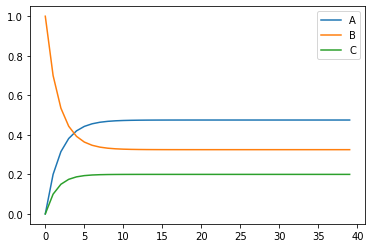

In [4]:
df = pd.DataFrame(np.concatenate(states), columns=['A','B','C'])
df.head()
df.plot();